<a href="https://colab.research.google.com/github/tonykelly00/BIGS-ephys2024/blob/main/notebook/BIGS-ephys2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installs dependencies

In [ ]:
!pip install umap-learn
!pip install scanpy
!pip install dandi
!pip install --no-deps ipfx
!pip install allensdk
!pip install methodtools

!pip install neuron-morphology

In [17]:
#googlecolab
!rm -rf BIGS-ephys2024
!git clone https://github.com/tonykelly00/BIGS-ephys2024.git
%mkdir BIGS-ephys2024/downloads/
%cd BIGS-ephys2024/downloads/

#local
#%cd ../downloads/

d:\sciebo\teaching\bigs\Ephys_OpenData_2024\test-github_colab\downloads


c:\anaconda3\envs\allensdk\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import umap

import sys

sys.path.append("../src")

c:\anaconda3\envs\allensdk\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Metadata file
The metadata file has information about each Patch-seq cell, including its different identifiers and assigned cell types.
imports the metadata which contains details of every cell patched and sequenced. 

In [2]:
#metadata = pd.read_csv("20200711_patchseq_metadata_mouse.csv")
url_dwl = 'https://uni-bonn.sciebo.de/public.php?service=files&t=Wp72txS2MeJRe7x&download=1'
metadata = pd.read_csv(url_dwl)
metadata.head()

,project,cell_specimen_id,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
0,mIVSCC-MET,601506507,Vip-IRES-Cre;Ai14-331294.04.01.01,left,VISpm4,331294,Vip-IRES-Cre;Ai14-331294,M,P55,NaN,...,NaN,full,0.361015,NaN,601506492,PS0810_E1-50_S88,BT035,CS180626100018,Vip Gpc3 Slc18a3,Vip-MET-2
1,mIVSCC-MET,601790961,Sst-IRES-Cre;Ai14-331663.04.01.01,left,VISpm5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.621829,NaN,601790945,PS0817_E1-50_S19,BT036,CS180626100041,Sst Tac2 Myh4,NaN
2,mIVSCC-MET,601803754,Sst-IRES-Cre;Ai14-331663.04.02.02,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.164240,NaN,601803733,PS0817_E1-50_S25,BT036,CS180626100035,Sst Calb2 Pdlim5,Sst-MET-3
3,mIVSCC-MET,601808698,Sst-IRES-Cre;Ai14-331663.04.02.03,right,VISp5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.483030,NaN,601808619,PS0817_E1-50_S26,BT036,CS180626100043,Sst Hpse Cbln4,Sst-MET-8
4,mIVSCC-MET,601810307,Sst-IRES-Cre;Ai14-331663.04.02.04,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,...,NaN,full,0.295656,NaN,601810292,PS0817_E1-50_S27,BT036,CS180626100034,Sst Calb2 Necab1,Sst-MET-3


# File manifest
The file manifest contains URLs for the different data files associated with the Patch-seq cells that are located in various archives.
Imports the manifest which contains the urls to the raw data for individual cells

In [3]:
#change - file is actually an xcel
#file_manifest = pd.read_excel("2021-09-13_mouse_file_manifest.xlsx")
url_dwl = 'https://uni-bonn.sciebo.de/public.php?service=files&t=WrqlVxQqs70AGCX&download=1'
file_manifest = pd.read_excel(url_dwl)
file_manifest.head()

,file_id,file_name,file_size,sha256_checksum,md5_checksum,technique,file_type,archive,archive_uri,project,cell_specimen_id
0,601506507,601506507.marker,268,305938ce75d55c3f43fbbe2d1d57e203139fa0c357bd73...,ecf2285ccbf5274af7d6a31a855ce950,morphology,marker_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
1,601506507,601506507_raw.swc,160503,6c82f5f974e4f6d2336a3606d4955823edd3c0173da60d...,7cc7ccdd627ef83fe54fcbf0feac79c2,morphology,raw_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
2,601506507,601506507_transformed.swc,271764,bad13a99c8f7f8a375e43109d80fd23d7028555a7dc42b...,f6a365d86ff65370af26439f0f16caaf,morphology,transformed_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
3,601506492,sub-599387254_ses-601506492_icephys.nwb,17881801,54003c5b599fa8081938713e8c7c3b69d1883b31b3ada1...,d854a21668f5f2229024d8cf0975de54,intracellular_electrophysiology,nwb,DANDI,https://api.dandiarchive.org/api/assets/e734ba...,mIVSCC-MET,601506507.0
4,609481756,PS0810_E1-50_GCTCATGA-TCTCTCCG_R2.fastq.gz,48014090,a2954fc88cb34bc30b9bca9e9f1a0cff2c9b53cf9a7268...,fc9441d44f1fab3e5b31cbb2c57228b0,transcriptomics,reverse_fastq,NEMO,http://data.nemoarchive.org/other/AIBS/AIBS_pa...,mIVSCC-MET,601506507.0


# Transcriptomic data
Download the transcriptomic expression data file. In that file, expression is quantified as counts-per-million (cpm), which normalises read counts for sequencing depth. Each row is a gene and each column is a cell.

In [4]:
# gene_data = pd.read_csv(
#     "20200513_Mouse_PatchSeq_Release_cpm.v2.csv",
#     index_col=0
# )

url_dwl = 'https://uni-bonn.sciebo.de/public.php?service=files&t=l0Cs80mxxDEmZSU&download=1'

gene_data = pd.read_csv(url_dwl,index_col=0)
gene_data

,PS0810_E1-50_S88,PS0817_E1-50_S19,PS0817_E1-50_S25,PS0817_E1-50_S26,PS0817_E1-50_S27,PS0817_E1-50_S28,PS0817_E1-50_S46,PS0817_E1-50_S52,PS0830_E1-50_S17,PS0830_E1-50_S19,...,SM-J39ZH_S561_E1-50,SM-J39ZH_S562_E1-50,SM-J39ZH_S565_E1-50,SM-J39ZH_S566_E1-50,SM-J39ZH_S571_E1-50,SM-J39ZH_S576_E1-50,SM-J3A1L_S592_E1-50,SM-J3A1L_S593_E1-50,SM-J3A1L_S603_E1-50,SM-J3A1L_S604_E1-50
0610005C13Rik,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610006L08Rik,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610007P14Rik,0.0,0.0,0.000000,152.239614,165.312294,58.189895,0.000000,0.000000,551.71563,109.361330,...,0.000000,0.0,32.223984,0.00000,24.467996,0.000000,51.366477,91.617703,82.706145,116.083588
0610009B22Rik,0.0,0.0,69.658825,0.000000,0.000000,0.000000,0.000000,57.335504,0.00000,78.641855,...,52.858114,0.0,27.620558,27.46475,40.197422,70.429453,0.000000,0.000000,0.000000,111.937746
0610009E02Rik,0.0,0.0,0.000000,0.000000,0.000000,1.662568,33.786897,0.000000,0.00000,0.000000,...,0.000000,0.0,20.715418,0.00000,1.747714,0.000000,0.000000,31.342899,0.000000,103.646061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s142,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s143,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s144,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s146,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
from generate_select_markers import generate_SelectMarkers, generate_gene_umap
generate_SelectMarkers(gene_data, metadata)

marker_genes_for_umap = generate_gene_umap(gene_data)


c:\anaconda3\envs\allensdk\Lib\site-packages\scanpy\preprocessing\_simple.py:406: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
c:\anaconda3\envs\allensdk\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\anaconda3\envs\allensdk\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[

In [6]:
# Proceed with UMAP embedding
embedding = umap.UMAP(n_neighbors=25).fit_transform(
    np.log2(gene_data.loc[marker_genes_for_umap, :].values.T + 1)
)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

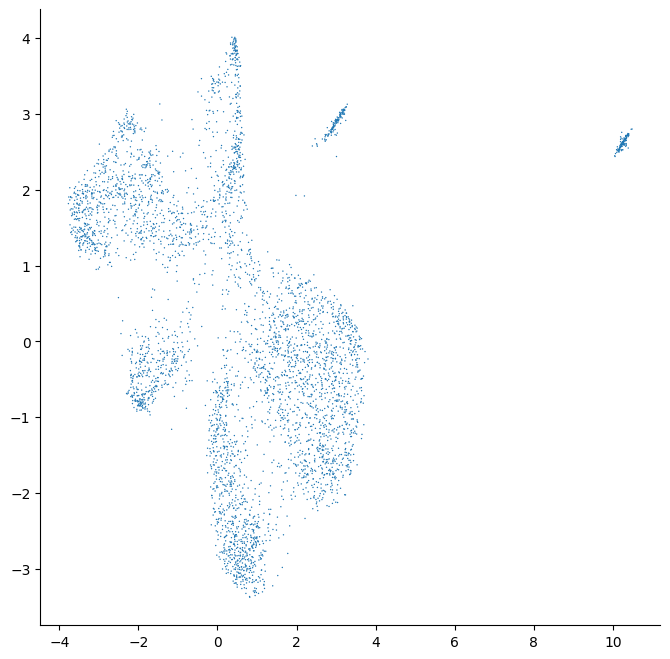

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
sns.despine()

# Identify the cells from a particular t-type (eg. Lamp5 Plch2 Dock5) 
task groups for classes and find general features of class and differences between subclasses

t_type=# Sst Chodl, 

Pvalb - Fast spiking cells with perisomatic axonal plexus eg Pvalb Calb1 Sst or 'Pvalb Akr1c18 Ntf3', Pvalb Gabrg1'

Sst - regular firing with dendritic innervation pattern eg Sst Calb2 Pdlim5 (Martinotti cells with L1 axonal plexus), Sst Esm1, Sst Crhr2 Efemp1, Sst Chodl (chandelier cells)


Vip -   regular firing bipolar dendrites across layers
        Not Vip Lmo1 Myl1 => MET 4 
        ephys similar to Vip Pygm C1ql1
        also see Vip Chat Htr1f   both MET Vip 1

Lamp5 - Neurogliaform cells Lamp5 Plch2

Sncg -  regular/adaptive firing with translaminar axonal innervation MET 2 high Rin

Compare morphological and electrophysiological properties
Cell position
Dendrite type
innervation pattern
Latency to firing
Firing pattern ISI
Sag/Ih

In [80]:
# Identify the cells from a particular t-type (eg. Lamp5 Plch2 Dock5) by 
t_type= 'Sst Chodl' #'Vip Chat Htr1f'#'Lamp5 Plch2 Dock5'#'Sst Esm1', #'Sst Crhr2 Efemp1', 'Pvalb Gabrg1', Pvalb Calb1 Sst, Sst Chodl, Vip Lmo1 Myl1
my_ttype_metadata = metadata.loc[metadata["T-type Label"] == t_type, :]

my_ttype_metadata

,project,cell_specimen_id,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
SM-GE4Q8_S089_E1-50,mIVSCC-MET,640061596,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350938.05.01.01,left,VISp5,350938,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350938,F,P49,NaN,...,NaN,full,0.577012,NaN,640061581,SM-GE65C_S125_E1-50,RSC-126,CS180626100030,Sst Chodl,Sst-MET-1
SM-GE4QF_S052_E1-50,mIVSCC-MET,643722391,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543.04.02.01,right,VISl6a,353543,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543,F,P49,NaN,...,NaN,NaN,NaN,NaN,643722371,SM-GE64V_S118_E1-50,RSC-128,CS180626100030,Sst Chodl,NaN
SM-GE4QF_S053_E1-50,mIVSCC-MET,643727497,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543.04.02.02,right,VISp6a,353543,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543,F,P49,NaN,...,NaN,full,0.905901,NaN,643727482,SM-GE64V_S119_E1-50,RSC-128,CS180626100030,Sst Chodl,Sst-MET-1
SM-GE4QF_S054_E1-50,mIVSCC-MET,643727534,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543.05.01.01,left,VISp5,353543,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543,F,P49,NaN,...,NaN,NaN,NaN,NaN,643727518,SM-GE64L_S003_E1-50,RSC-129,CS180626100030,Sst Chodl,NaN
SM-GE4QF_S057_E1-50,mIVSCC-MET,643754730,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543.04.01.01,left,VISp5,353543,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-353543,F,P49,NaN,...,NaN,full,0.688930,NaN,643754668,SM-GE64L_S004_E1-50,RSC-129,CS180626100030,Sst Chodl,Sst-MET-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SM-GE94J_S090_E1-50,mIVSCC-MET,873848729,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-463221.04.02.01,right,VISli6a,463221,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-463221,M,P58,NaN,...,NaN,NaN,NaN,NaN,873848501,SM-GBMG3_S035_E1-50,RSC-214,CS180626100030,Sst Chodl,NaN
SM-GE94J_S091_E1-50,mIVSCC-MET,873854264,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-463221.03.01.01,left,VISp1,463221,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-463221,M,P58,NaN,...,NaN,full,0.109572,NaN,873853899,SM-GBMG3_S039_E1-50,RSC-214,CS180626100030,Sst Chodl,Sst-MET-1
SM-GE94J_S093_E1-50,mIVSCC-MET,873910521,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-463221.04.01.01,left,VISp6a,463221,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-463221,M,P58,NaN,...,NaN,NaN,NaN,NaN,873910346,SM-GBMG3_S036_E1-50,RSC-214,CS180626100030,Sst Chodl,NaN
SM-J39RG_S236_E1-50,mIVSCC-MET,961105952,Slc17a8-iCre;Ai14-490008.03.01.01,left,VISp5,490008,Slc17a8-iCre;Ai14-490008,F,P56,NaN,...,NaN,NaN,NaN,NaN,961105846,SM-J39WG_S193_E1-50,RSC-229,CS180626100030,Sst Chodl,NaN


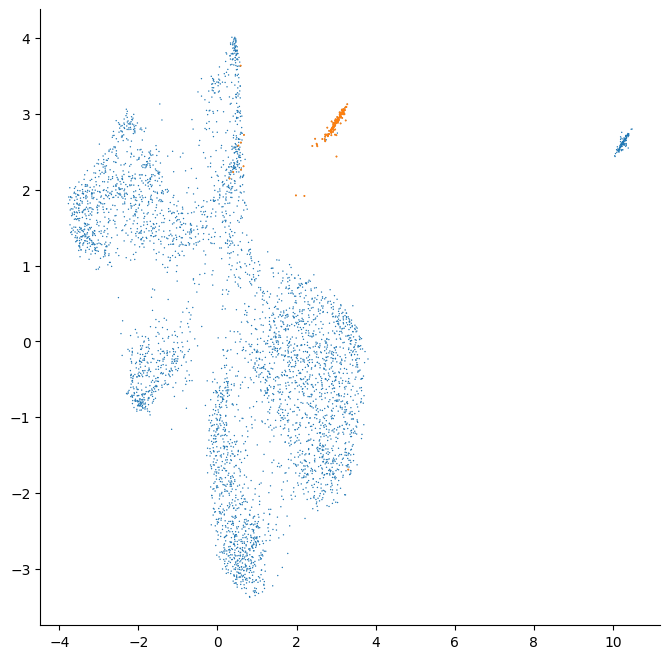

In [82]:
my_ttype_mask = gene_data.columns.isin(my_ttype_metadata["transcriptomics_sample_id"].tolist())

plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
plt.scatter(*embedding[my_ttype_mask, :].T, s=2, edgecolor="none")
sns.despine()

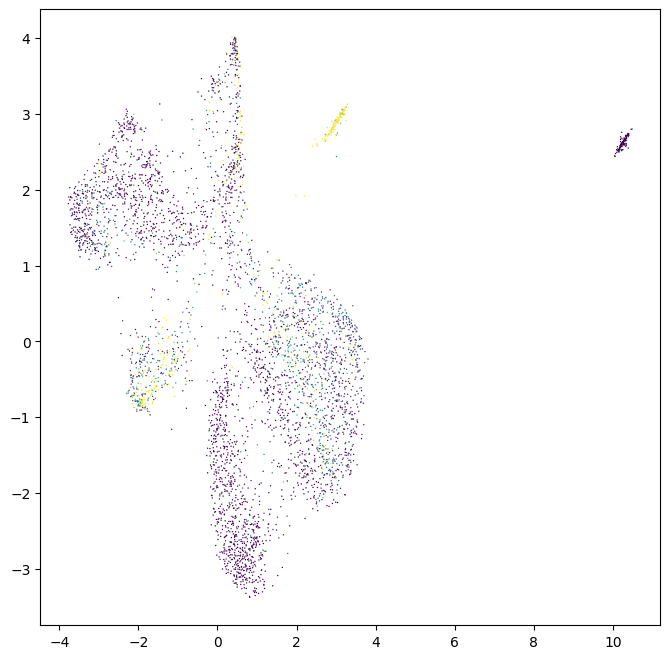

In [83]:
plt.figure(figsize=(8, 8))
plt.scatter(
    *embedding.T,
    s=1,
    c=gene_data.loc["Npy", :].values,
    vmin=0,
    vmax=5e3,
    cmap="viridis",
    edgecolor="none"
)

In [84]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == t_type) &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]

In [85]:
my_ttype_with_recon_metadata.iloc[0, :]

project                                                              mIVSCC-MET
cell_specimen_id                                                      640061596
cell_specimen_name              Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350938.05.01.01
hemisphere                                                                 left
structure                                                                 VISp5
donor_id                                                                 350938
donor_name                               Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350938
biological_sex                                                                F
age                                                                         P49
ethnicity                                                                   NaN
medical_conditions                                                          NaN
full_genotype                 Nos1-CreERT2/wt;Sst-IRES-FlpO/wt;Ai65(RCFL-tdT...
dendrite_type                           

Extract the url for the selected t-type and download from Dandi

In [86]:
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]
nwb_urls["archive_uri"].values[0]

'https://api.dandiarchive.org/api/assets/056f2fca-d219-47ac-96e9-c70721110ccc/download/'

In [87]:
!dandi download https://api.dandiarchive.org/api/assets/a33770cd-a9ff-41d0-8463-6e38a3e4a1af/download/

PATH                                    SIZE     DONE    DONE% CHECKSUM STATUS  MESSAGE          
sub-601462951_ses-601803733_icephys.nwb                                 error   FileExistsError  
Summary:                                0 Bytes  0 Bytes                1 error 1 FileExistsError
                                        +20.7 MB 0.00%                                           


2024-10-09 23:17:35,787 [    INFO] Logs saved in C:\Users\Tony Kelly\AppData\Local\dandi\dandi-cli\Logs\2024.10.09-21.17.34Z-7100.log


In [88]:
nwb_path = nwb_urls["file_name"].values[0]
nwb_path

'sub-639391277_ses-640061581_icephys.nwb'

In [89]:
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps

data_set = create_ephys_data_set(nwb_file=nwb_path)
drop_failed_sweeps(data_set)
cell_features, sweep_features, cell_record, sweep_records, _, _ = \
    extract_data_set_features(data_set, subthresh_min_amp=-100.0)

c:\anaconda3\envs\allensdk\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
c:\anaconda3\envs\allensdk\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [90]:
cell_features.keys()

dict_keys(['long_squares', 'short_squares', 'ramps'])

In [91]:
cell_features["long_squares"].keys()

dict_keys(['sweeps', 'v_baseline', 'rheobase_i', 'rheobase_sweep', 'spiking_sweeps', 'fi_fit_slope', 'hero_sweep', 'sag', 'vm_for_sag', 'subthreshold_sweeps', 'subthreshold_membrane_property_sweeps', 'input_resistance', 'tau'])

In [92]:
cell_features["long_squares"]["rheobase_sweep"]

{'avg_rate': 1.0000000000000002,
 'peak_deflect': (36.000004, 72523),
 'stim_amp': 40.0,
 'v_baseline': -68.9747314453125,
 'sag': -46.24899673461914,
 'adapt': nan,
 'latency': 0.4298599999999999,
 'isi_cv': nan,
 'mean_isi': nan,
 'median_isi': nan,
 'first_isi': nan,
 'index': 4,
 'spikes': [{'threshold_index': 72493,
   'clipped': False,
   'threshold_t': 0.9298599999999999,
   'threshold_v': -38.125,
   'threshold_i': 40.0,
   'peak_index': 72523,
   'peak_t': 0.9304600000000001,
   'peak_v': 36.000003814697266,
   'peak_i': 40.0,
   'trough_index': 75864,
   'trough_t': 0.9972799999999999,
   'trough_v': -54.062503814697266,
   'trough_i': 40.0,
   'upstroke_index': 72508,
   'upstroke': 263.3640072069885,
   'upstroke_t': 0.9301599999999999,
   'upstroke_v': -3.5,
   'downstroke_index': 72541,
   'downstroke': -84.69928734243615,
   'downstroke_t': 0.93082,
   'downstroke_v': 13.625000953674316,
   'isi_type': 'detour',
   'fast_trough_index': 72637,
   'fast_trough_t': 0.932739

In [93]:
df=cell_features["long_squares"] # use the df to explore data sweeps

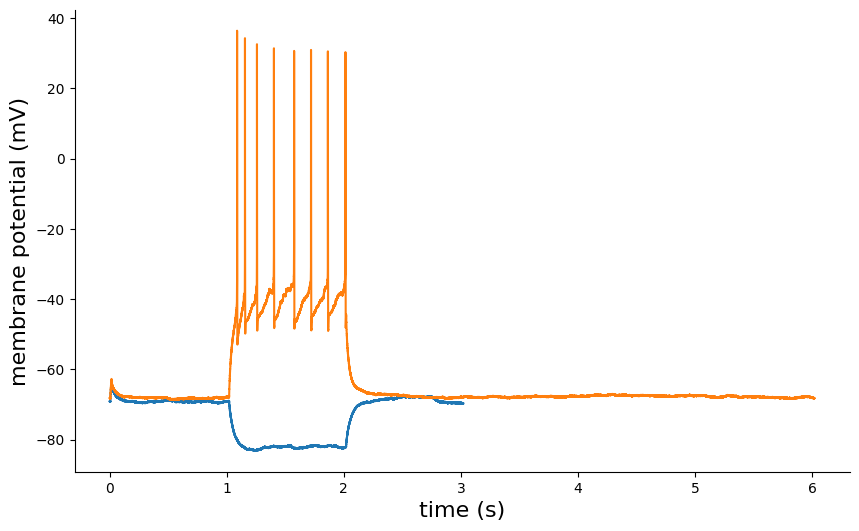

In [94]:
supswp = data_set.sweep(cell_features["long_squares"]["hero_sweep"]["sweep_number"])
#supswp = data_set.sweep(cell_features["long_squares"]["spiking_sweeps"][6]["sweep_number"])

subswp = data_set.sweep(cell_features["long_squares"]['sweeps'][2]["sweep_number"])
plt.figure(figsize=(10, 6))

plt.plot(subswp.t, subswp.v)
plt.plot(supswp.t, supswp.v)
plt.xlabel("time (s)", fontsize=16)
plt.ylabel("membrane potential (mV)", fontsize=16)
sns.despine()

Passive properties

In [ ]:

print(f"Sag {cell_features['long_squares']['sag']}.")
print(f"Input resistance {cell_features['long_squares']['input_resistance']} mOhms.")
print(f"Membrane time constant {cell_features['long_squares']['tau']} s.")
print(f"Membrane Capacitance {cell_features['long_squares']['tau']} s.")

Active properties

In [ ]:
print(f"Rheobase {cell_features['long_squares']['rheobase_i']} pA.")
print(f"Spike latency {cell_features['long_squares']['rheobase_sweep']['latency']} s.")
print(f"Threshold {cell_features['long_squares']['rheobase_sweep']['spikes'][0]['threshold_v']} mV.")

print(f"Spike rate {cell_features['long_squares']['hero_sweep']['avg_rate']} freq.")
print(f"First ISI {cell_features['long_squares']['hero_sweep']['first_isi']} s.")
print(f"ISI_CV {cell_features['long_squares']['hero_sweep']['isi_cv']}.")


In [ ]:
cell_features["long_squares"]["rheobase_sweep"]['spikes'][0]['threshold_v']

In [ ]:
cell_features["long_squares"]["sweeps"][1]

Morphology
Now we'll get the SWC file that has the morphological reconstruction of this cell and use the neuron_morphology library to process it.

In [121]:
swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]

In [ ]:
swc_urls["archive_uri"].values[0]

Use the swc url to download the morphology from brainlib

In [ ]:
!wget ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/659012847_transformed.swc

In [ ]:
swc_path = swc_urls["file_name"].values[0]
swc_path

In [129]:
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.constants import AXON, BASAL_DENDRITE, SOMA

In [130]:
morph = morphology_from_swc(swc_path)

In [ ]:
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])
#axon in blue
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
#dendrite in orange
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]

soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]


plt.figure(figsize=(10, 10))

plt.scatter(axon_x, axon_y, s=1, edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, c="black", edgecolor="none")


plt.gca().set(xticks=[], yticks=[])
plt.gca().set_aspect("equal")
sns.despine(left=True, bottom=True)

Extract morphological features such as dendritic width and height and their ratio.

In [ ]:
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
from neuron_morphology.features.default_features import default_features

fe = FeatureExtractor()
fe.register_features(default_features)
feature_extraction_run = fe.extract(Data(morph))

In [ ]:
feature_extraction_run.results

In [ ]:
width = feature_extraction_run.results["axon.node.dimension"]["width"]
height = feature_extraction_run.results["axon.node.dimension"]["height"]
wh_ratio = width / height
print(width, height, wh_ratio)